In [337]:
import pandas as pd
import numpy as np
from combine_data import combine_data
from data_processing import ADC_to_v,format_timestamps,normalize_data
import librosa
import os,shutil
import matplotlib.pyplot as plt
import scipy
from scipy.stats import kurtosis

In [2]:


raw_data,labels,time_stamps = combine_data('./../data/al_data')
labels -=1

C:\Users\Nazem\OneDrive\Documents\GitHub\emg_DVA435_CDT406\src\combine_data.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)
C:\Users\Nazem\OneDrive\Documents\GitHub\emg_DVA435_CDT406\src\combine_data.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  time_stamps = np.array(time_stamps)


In [294]:
voltage_values = []
time = []
for i in raw_data:
    voltage_values.append(ADC_to_v(i))
for i in time_stamps:
    time.append(format_timestamps(i))

In [368]:
n_sample = 6

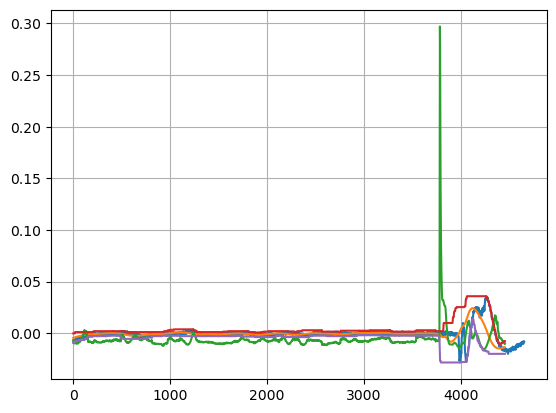

In [369]:
win_size = 200
# plt.subplot(3,1,1)
f1 = np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample],win_size).mean(axis=1)
f2 = kurtosis(np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample],win_size),axis=1)/100
f3 = np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample],win_size).max(axis=1)
f4 = np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample],win_size).min(axis=1)
plt.plot(voltage_values[n_sample])
plt.plot(f1)
plt.plot(f2)
plt.plot(f3)
plt.plot(f4)
plt.grid()

# plt.subplot(3,1,2)
# plt.plot(voltage_values[n_sample+1])
# plt.plot(np.convolve(voltage_values[n_sample+1],np.ones(win_size)/win_size,'valid'))
# plt.plot(np.lib.stride_tricks.sliding_window_view(abs(voltage_values[n_sample+1]),win_size).mean(axis=1))
# plt.plot(np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample+1],win_size).max(axis=1))
# plt.plot(np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample+1],win_size).min(axis=1))
# plt.grid()
# plt.subplot(3,1,3)
# plt.plot(voltage_values[n_sample+2])
# plt.plot(np.convolve(voltage_values[n_sample+2],np.ones(win_size)/win_size,'valid'))
# plt.plot(np.lib.stride_tricks.sliding_window_view(abs(voltage_values[n_sample+2]),win_size).mean(axis=1))
# plt.plot(np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample+2],win_size).max(axis=1))
# plt.plot(np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample+2],win_size).min(axis=1))
# plt.grid()

In [365]:
np.lib.stride_tricks.sliding_window_view(voltage_values[n_sample],250,).var(axis=1)

array([2.6742207e-06, 2.7076178e-06, 2.7532340e-06, ..., 5.6530634e-04,
       5.6935608e-04, 5.7349441e-04], dtype=float32)

In [6]:
from librosa import display

In [7]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def filter(voltage_values,low_cut=1,high_cut=55,fs = 1e3,):
    '''
    band pass filter based on the scipy butter bandpass, allowing frequency between low cut and high cut to pass through.
    input : np.array of the data voltage values.
    low_cut : lowest frequency defaults at 1
    high cut : highest frequency in the band filter defaults at 55.
    '''
    return butter_bandpass_filter(voltage_values,lowcut=low_cut,highcut=high_cut,fs = fs)

In [8]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [9]:
from scipy.fft import fft, fftfreq
fft_vals = abs(fft(voltage_values[n_sample],n=16))
fft_vals

array([7.5604916e-02, 8.5615097e-03, 2.3798838e-03, 2.2327295e-03,
       1.9657740e-03, 3.6640762e-04, 1.1365518e-03, 2.2461126e-03,
       2.3841858e-07, 2.2461126e-03, 1.1365518e-03, 3.6640762e-04,
       1.9657740e-03, 2.2327295e-03, 2.3798838e-03, 8.5615097e-03],
      dtype=float32)

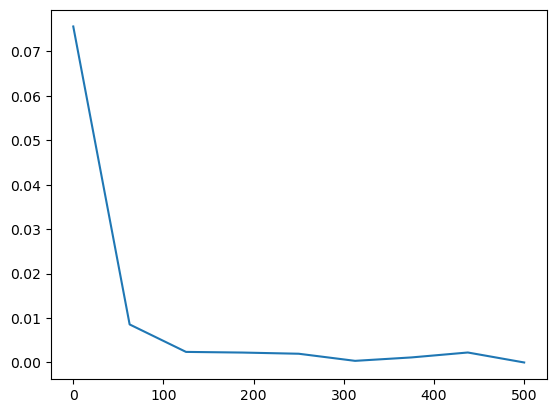

In [10]:
plt.plot(librosa.fft_frequencies(sr=1000, n_fft=16),fft_vals[:len(fft_vals)//2+1])

In [11]:
filtered = butter_bandpass_filter(voltage_values[n_sample],1,40,1000)

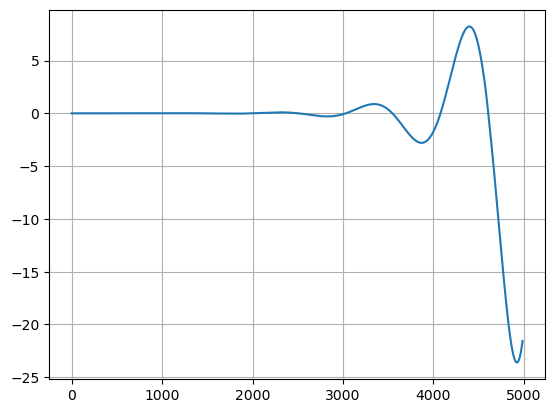

In [12]:
plt.plot(filtered)
plt.grid()

In [13]:
from scipy.integrate import cumtrapz

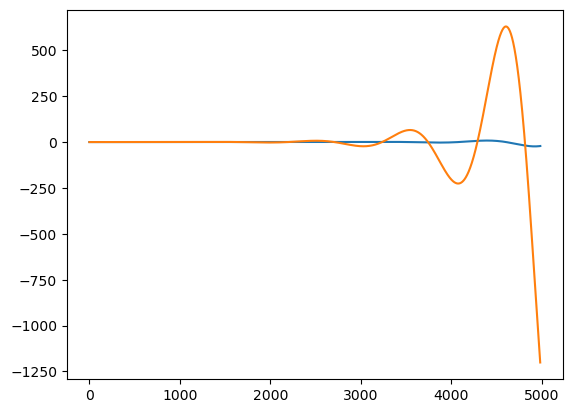

In [14]:
plt.plot((filtered))
plt.plot(1/np.pi * cumtrapz(filtered))

In [15]:
from feature_extraction import *

In [16]:
filtered_values = []
for i in voltage_values:
    filtered_values.append(filter(i,high_cut=60))

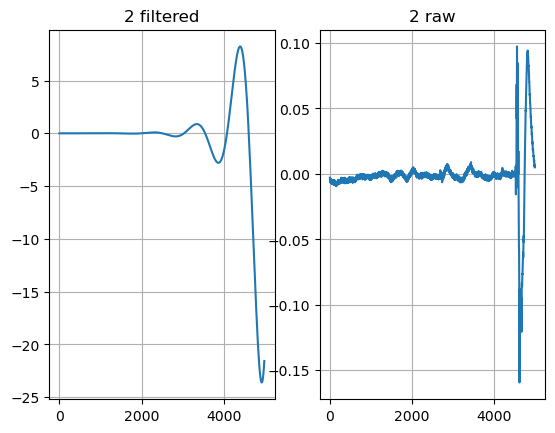

In [17]:

plt.subplot(1,2,1)
plt.title(f"{labels[n_sample]} filtered")
plt.plot(filtered)
plt.grid()
plt.subplot(1,2,2)
plt.title(f"{labels[n_sample]} raw")
plt.plot(voltage_values[n_sample])
plt.grid()

In [18]:
features = [root_mean_squared,iemg,mean_absolute_value,variance,wave_form_length,mean,median,skewness,kurt,zero_crossing_rate]
df = extract_features(voltage_values,label = labels,features_no=10,overlapping_percentage=0.25,features_funcs=features)
df

zero_crossing_rate


C:\Users\Nazem\OneDrive\Documents\GitHub\emg_DVA435_CDT406\src\feature_extraction.py:80: UserWarning: needs fixing the results might be wrong.
  warnings.warn("needs fixing the results might be wrong.")


,root_mean_squared1,root_mean_squared2,root_mean_squared3,root_mean_squared4,root_mean_squared5,root_mean_squared6,root_mean_squared7,root_mean_squared8,root_mean_squared9,root_mean_squared10,...,zero_crossing_rate2,zero_crossing_rate3,zero_crossing_rate4,zero_crossing_rate5,zero_crossing_rate6,zero_crossing_rate7,zero_crossing_rate8,zero_crossing_rate9,zero_crossing_rate10,label
0,0.003735,0.002025,0.001953,0.001820,0.001993,0.002010,0.002392,0.002358,0.002235,0.001744,...,0.112785,0.111644,0.125799,0.113699,0.128767,0.110502,0.114612,0.122831,0.132648,0
1,0.002783,0.001586,0.001429,0.001545,0.001572,0.001577,0.001461,0.001421,0.001472,0.005821,...,0.135875,0.154448,0.152004,0.150049,0.150049,0.160313,0.159335,0.154936,0.149071,1
2,0.004032,0.003275,0.002314,0.001922,0.001710,0.001536,0.001689,0.001609,0.001637,0.028590,...,0.048000,0.067556,0.107556,0.129778,0.141333,0.119111,0.120889,0.122667,0.113778,2
3,0.016296,0.004999,0.002652,0.002787,0.002350,0.002257,0.002238,0.001976,0.004689,0.004825,...,0.098554,0.104981,0.102839,0.107392,0.109802,0.113016,0.123996,0.120246,0.089984,0
4,0.002683,0.001651,0.002688,0.002655,0.002641,0.001829,0.002235,0.007636,0.010239,0.010160,...,0.159084,0.140054,0.151353,0.151353,0.153732,0.118347,0.079393,0.055605,0.077907,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.006145,0.001944,0.001398,0.001626,0.001876,0.002190,0.002357,0.002580,0.009167,0.016964,...,0.124224,0.158829,0.133984,0.104703,0.089618,0.076309,0.055013,0.068323,0.040816,1
174,0.004116,0.003084,0.002709,0.002349,0.002042,0.001721,0.001628,0.001846,0.001875,0.008736,...,0.030151,0.046482,0.056533,0.077261,0.100503,0.118090,0.113065,0.119347,0.121859,2
175,0.003237,0.003806,0.005080,0.005232,0.004980,0.003910,0.002569,0.002910,0.002899,0.002776,...,0.084497,0.062500,0.056913,0.059008,0.079958,0.085545,0.080656,0.080307,0.089735,0
176,0.005051,0.001872,0.001399,0.001408,0.001569,0.001720,0.001890,0.002046,0.010871,0.018015,...,0.153119,0.161626,0.153119,0.137996,0.130435,0.117202,0.102079,0.095463,0.078450,1


In [19]:
df.columns

Index(['root_mean_squared1', 'root_mean_squared2', 'root_mean_squared3',
       'root_mean_squared4', 'root_mean_squared5', 'root_mean_squared6',
       'root_mean_squared7', 'root_mean_squared8', 'root_mean_squared9',
       'root_mean_squared10',
       ...
       'zero_crossing_rate2', 'zero_crossing_rate3', 'zero_crossing_rate4',
       'zero_crossing_rate5', 'zero_crossing_rate6', 'zero_crossing_rate7',
       'zero_crossing_rate8', 'zero_crossing_rate9', 'zero_crossing_rate10',
       'label'],
      dtype='object', length=101)

In [382]:
import seaborn as sns
from sklearn.decomposition import PCA
import pickle as pk


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale,normalize,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

In [370]:
X,y = df.drop('label',axis = 1),df['label']
X_scaled =minmax_scale(X)

In [371]:
pca = PCA(n_components=25)
pca.fit(X_scaled)
components = pca.transform(X_scaled)

In [372]:
x_train,x_test,y_train,y_test = train_test_split(components,y,train_size=0.7)
x_train.shape

(124, 25)

In [384]:
with open('./pca.pkl','wb') as pkl:
    pk.dump(pca,pkl)

In [373]:
# parameter 1 
encoding_dim = 100
# ncol # without the label column
ncol = x_train.shape[1:][0]
ncol

25

In [374]:
model = Sequential()
model.add(keras.layers.Input(shape=x_train.shape[1:]))
model.add(keras.layers.Dense(15))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(5))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3,activation = 'softmax'))

In [375]:
loss_fn = loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=loss_fn,metrics = ['accuracy'],)

In [376]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 15)                390       
                                                                 
 dropout_19 (Dropout)        (None, 15)                0         
                                                                 
 dense_29 (Dense)            (None, 5)                 80        
                                                                 
 dropout_20 (Dropout)        (None, 5)                 0         
                                                                 
 dense_30 (Dense)            (None, 3)                 18        
                                                                 
Total params: 488
Trainable params: 488
Non-trainable params: 0
_________________________________________________________________


In [377]:
model.fit(x = x_train,y=y_train,validation_split=0.2,epochs=200,verbose=False)

In [378]:
from sklearn.svm import SVC

In [379]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [380]:
predictions_ann = np.argmax(model.predict(x_test),axis=1)
predictions_svc = svm.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test,y_pred=predictions_ann))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.72      0.81      0.76        16
           2       0.79      0.79      0.79        19

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



In [385]:
model.save('ann.h5')

In [381]:
import inspect

In [101]:
print(inspect.getsource(ADC_to_v))

def ADC_to_v(sample:np.array,max_voltage = 1.8,ADC_resolution = 4095,resting_voltage=1.5):
    return sample * (max_voltage)/ADC_resolution - 1.5



In [102]:
dataMax = np.max([i for i in map(len,raw_data)])
out_size = 128
max_features = 20000

In [79]:
X = np.array(raw_data)
y = np.array(labels)

In [95]:
for i,element in enumerate(X):
    temp = np.zeros(dataMax)
    temp[:len(element)] += element[0]
    X[i] = np.array(temp,dtype='float32')
    

In [96]:
X = tf.convert_to_tensor([tf.convert_to_tensor(i) for i in X])

In [97]:
X = np.expand_dims(X,axis=2)

In [98]:
model = Sequential()
model.add(keras.layers.Input(shape = X.shape[1:]))
model.add(keras.layers.Masking(mask_value=0))
model.add(keras.layers.Conv1D(2,))
model.add(keras.layers.Dense(3,activation = 'softmax'))
loss_fn = loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=loss_fn,metrics = ['accuracy'],)

TypeError: __init__() missing 1 required positional argument: 'kernel_size'

In [ ]:
model.build()

In [ ]:
model.summary()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [ ]:
model.fit(x_train,y_train)